In [1]:
#Loading packages
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score 
import datetime as dt
from scipy import stats as sts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from datetime import datetime as dt
import math

In [4]:
#loading accepted da
data=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRfvpziPwg314Y2rxxb58Ua3ScRcR6oFUlbjmceCS7NvdN6IfQBn548dwAjWVx5ZQ/pub?output=csv",low_memory=False)

In [5]:
#checking first few columns of accpted Malignant
data.head(5).head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [8]:
#checking column names
from IPython.display import display_html
display(data.info())
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
Age               116 non-null int64
BMI               116 non-null float64
Glucose           116 non-null int64
Insulin           116 non-null float64
HOMA              116 non-null float64
Leptin            116 non-null float64
Adiponectin       116 non-null float64
Resistin          116 non-null float64
MCP.1             116 non-null float64
Classification    116 non-null int64
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
Age               116 non-null int64
BMI               116 non-null float64
Glucose           116 non-null int64
Insulin           116 non-null float64
HOMA              116 non-null float64
Leptin            116 non-null float64
Adiponectin       116 non-null float64
Resistin          116 non-null float64
MCP.1             116 non-null float64
Classification    116 non-null int64
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


None

In [9]:
#checking missing values 
data.isnull()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
111,False,False,False,False,False,False,False,False,False,False
112,False,False,False,False,False,False,False,False,False,False
113,False,False,False,False,False,False,False,False,False,False
114,False,False,False,False,False,False,False,False,False,False


In [10]:
#checking sum of data per column 
data.count().tail()

Leptin            116
Adiponectin       116
Resistin          116
MCP.1             116
Classification    116
dtype: int64

In [11]:
#checking percentage of missing data 
data_missing=data.isna()
data_num_missing = data_missing.sum()
data_num_missing*100/len(data)

Age               0.0
BMI               0.0
Glucose           0.0
Insulin           0.0
HOMA              0.0
Leptin            0.0
Adiponectin       0.0
Resistin          0.0
MCP.1             0.0
Classification    0.0
dtype: float64

In [8]:
#coping data before wrangling to maintain original set incase we want to go back
import copy
data_1=copy.deepcopy(data)

In [12]:
#dropping NA
data.dropna(inplace=True)

In [13]:
#checking shape
data.shape

(116, 10)

In [14]:
# scikit-learn bootstrap
from sklearn.utils import resample

In [21]:
boot_data = resample(data, replace=True, n_samples=5000, random_state=1)

In [23]:
boot_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 37 to 19
Data columns (total 10 columns):
Age               5000 non-null int64
BMI               5000 non-null float64
Glucose           5000 non-null int64
Insulin           5000 non-null float64
HOMA              5000 non-null float64
Leptin            5000 non-null float64
Adiponectin       5000 non-null float64
Resistin          5000 non-null float64
MCP.1             5000 non-null float64
Classification    5000 non-null int64
dtypes: float64(7), int64(3)
memory usage: 429.7 KB


In [24]:
#the X variable will take everything expect theClassification, as x is the input and is supposed to match to the correct label
X =boot_data.drop(columns = ["Classification"])
y = boot_data['Classification']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import time
import matplotlib.pyplot as plt
import seaborn as sns

Average accuracy of holdout approach:  1.0
Mean Time taken by holdout approach:  0.23396299362182618
-------------------


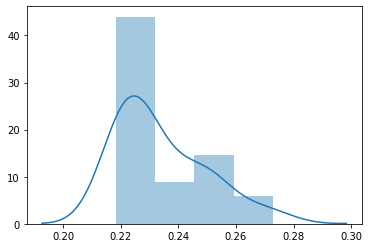

In [26]:
#Random forest using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=30,stratify=y)
randomforest_split = RandomForestClassifier()

time_holdout = []
score = []
for i in range(25):
  #time.time() is used to calculate the time taken for the model to run
  start_holdout = time.time()
  #trains the random forest using cross validation
  randomforest_split.fit(X = X_train, y = y_train)
  score.append(randomforest_split.score(X_test, y_test))
  
  end_holdout = time.time()
  time_holdout.append(end_holdout - start_holdout)
    
print("Average accuracy of holdout approach: ",np.mean(score))
print('Mean Time taken by holdout approach: ' ,np.mean(time_holdout))
print('-------------------')
sns.distplot(time_holdout)
plt.show()

Average accuracy of cross validation approach:  1.0
Mean Time taken by cross validation approach:  2.1670778942108155
-------------------


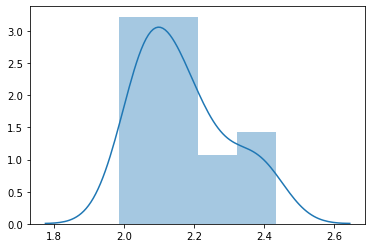

In [28]:
randomforest = RandomForestClassifier()

time_cv = []
for i in range(25):
  #time.time() is used to calculate the time taken for the model to run
  start_cv = time.time()
  #trains the random forest using cross validation
  cv_score = cross_val_score(randomforest, X, y, cv=8)
  end_cv = time.time()
  time_cv.append(end_cv - start_cv)

print("Average accuracy of cross validation approach: ",np.mean(cv_score))
print('Mean Time taken by cross validation approach: ' ,np.mean(time_cv))
print('-------------------')
sns.distplot(time_cv)
plt.show()

#conclution
With is dataset random forest seem to do better than any othe classification model. 